In [1]:
# clusters are made according to feature . no label present
# K centorid ,random point are made . according to value of K
# compute distance of every point from centroids
# points near to green centroid are green cluster, near to red centroid are red clusters
# shift the centroids to middle of each cluster
# re-compute distance of points from newly shifted centroid.
# divide the points into cluster with closest centroids
# adjust centroids again
# re_compute clusters and repeat this till data points stop changing clusters


# Determine correct no. of clusters (k)

In [2]:
# elbow Method

In [3]:
# get SSE (sum of squared error)
# SSE = SSE1 + SSE2 ..... +SSEk
# plot graph of SSE vs K
# select K value for the elbow of graph

# Excercise

In [4]:
import pandas as pd
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
df["Cluster"]=km.fit_predict(df[["Age","Income($)"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
df1=df[df["Cluster"]==0]

In [7]:
df2=df[df["Cluster"]==1]

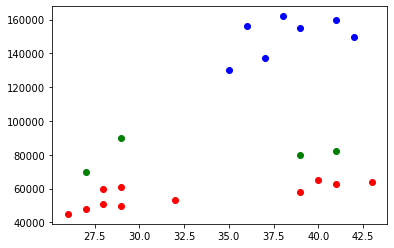

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df[df["Cluster"]==0]["Age"],df[df["Cluster"]==0]["Income($)"],color="r")
plt.scatter(df[df["Cluster"]==1]["Age"],df[df["Cluster"]==1]["Income($)"],color="b")
plt.scatter(df[df["Cluster"]==2]["Age"],df[df["Cluster"]==2]["Income($)"],color="g")

In [9]:
# points scatterred unevenly as the graph is not scaled
# thus scaling used

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[["Age","Income($)"]]=scaler.fit_transform(df[["Age","Income($)"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [11]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
df["Cluster_new"]=km.fit_predict(df[["Age","Income($)"]])
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'income')

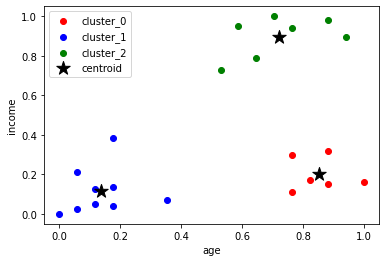

In [12]:
%matplotlib inline
plt.scatter(df[df["Cluster_new"]==0]["Age"],df[df["Cluster_new"]==0]["Income($)"],color="r",label="cluster_0")
plt.scatter(df[df["Cluster_new"]==1]["Age"],df[df["Cluster_new"]==1]["Income($)"],color="b",label="cluster_1")
plt.scatter(df[df["Cluster_new"]==2]["Age"],df[df["Cluster_new"]==2]["Income($)"],color="g",label="cluster_2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",s=200,label="centroid")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")

## Elbow plot

In [13]:
sse=[]
k_rng = range(1,10) #plotting for eevery value of k
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_transform(df[['Age','Income($)']])
    sse.append(km.inertia_) # k inetria calculates sse


C:\Users\91637\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'sse')

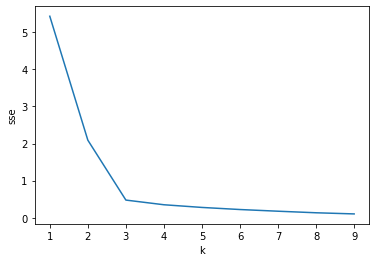

In [14]:
plt.plot(k_rng,sse)
plt.xlabel("k")
plt.ylabel("sse")

# Excercise 2

In [15]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

C:\Users\91637\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


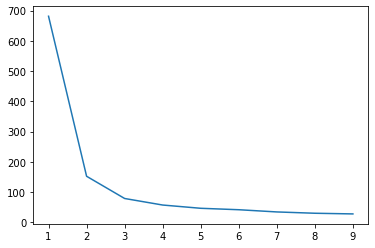

In [18]:
from sklearn.cluster import KMeans
km=KMeans()
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(iris.data,iris.feature_names)
    sse.append(km.inertia_)
plt.plot(k_range,sse)

In [19]:
km=KMeans(n_clusters=3)

clusters=km.fit_predict(iris.data,iris.feature_names)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
df=pd.DataFrame(clusters)
df["clusters"]=df[0]
df["sepal length (cm)"]=iris.data[:,0]
df["sepal width (cm)"]=iris.data[:,1]
df["petal length (cm)"]=iris.data[:,2]
df["petal width (cm)"]=iris.data[:,3]
df.head()

,0,clusters,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,1,5.1,3.5,1.4,0.2
1,1,1,4.9,3.0,1.4,0.2
2,1,1,4.7,3.2,1.3,0.2
3,1,1,4.6,3.1,1.5,0.2
4,1,1,5.0,3.6,1.4,0.2


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]=scaler.fit_transform(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
df.head()

,0,clusters,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,1,0.222222,0.625000,0.067797,0.041667
1,1,1,0.166667,0.416667,0.067797,0.041667
2,1,1,0.111111,0.500000,0.050847,0.041667
3,1,1,0.083333,0.458333,0.084746,0.041667
4,1,1,0.194444,0.666667,0.067797,0.041667


In [22]:
km=KMeans(n_clusters=3)

clusters1=km.fit_predict(df.drop(["clusters",0],axis=1))
df["clusters1"]=clusters1
df.head()

,0,clusters,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters1
0,1,1,0.222222,0.625000,0.067797,0.041667,1
1,1,1,0.166667,0.416667,0.067797,0.041667,1
2,1,1,0.111111,0.500000,0.050847,0.041667,1
3,1,1,0.083333,0.458333,0.084746,0.041667,1
4,1,1,0.194444,0.666667,0.067797,0.041667,1


Text(0.5, 0, 'sepal')

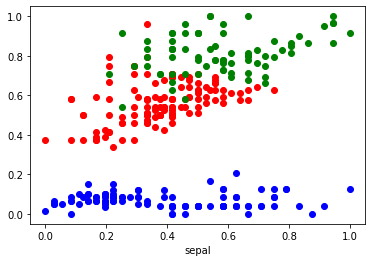

In [23]:
plt.scatter(df[df["clusters"]==0][["sepal length (cm)","sepal width (cm)"]],df[df["clusters"]==0] \
            [["petal length (cm)","petal width (cm)"]],color="r")
plt.scatter(df[df["clusters"]==1][["sepal length (cm)","sepal width (cm)"]],df[df["clusters"]==1]\
            [["petal length (cm)","petal width (cm)"]],color="b")
plt.scatter(df[df["clusters"]==2][["sepal length (cm)","sepal width (cm)"]],df[df["clusters"]==2]\
            [["petal length (cm)","petal width (cm)"]],color="g")
plt.xlabel("sepal")

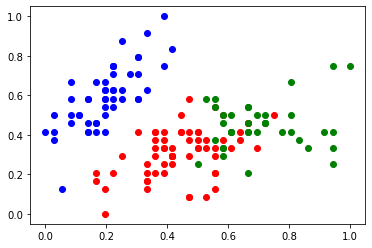

In [24]:
plt.scatter(df[df["clusters"]==0]["sepal length (cm)"],df[df["clusters"]==0]["sepal width (cm)"],color="r")
plt.scatter(df[df["clusters"]==1]["sepal length (cm)"],df[df["clusters"]==1]["sepal width (cm)"],color="b")
plt.scatter(df[df["clusters"]==2]["sepal length (cm)"],df[df["clusters"]==2]["sepal width (cm)"],color="g")

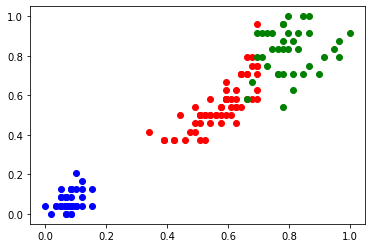

In [25]:
plt.scatter(df[df["clusters"]==0]["petal length (cm)"],df[df["clusters"]==0]["petal width (cm)"],color="r")
plt.scatter(df[df["clusters"]==1]["petal length (cm)"],df[df["clusters"]==1]["petal width (cm)"],color="b")
plt.scatter(df[df["clusters"]==2]["petal length (cm)"],df[df["clusters"]==2]["petal width (cm)"],color="g")

## with scaling
-no change

Text(0, 0.5, 'petal l&w')

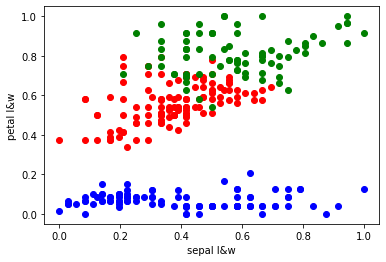

In [26]:
plt.scatter(df[df["clusters1"]==0][["sepal length (cm)","sepal width (cm)"]],df[df["clusters1"]==0] \
            [["petal length (cm)","petal width (cm)"]],color="r")
plt.scatter(df[df["clusters1"]==1][["sepal length (cm)","sepal width (cm)"]],df[df["clusters1"]==1]\
            [["petal length (cm)","petal width (cm)"]],color="b")
plt.scatter(df[df["clusters1"]==2][["sepal length (cm)","sepal width (cm)"]],df[df["clusters1"]==2]\
            [["petal length (cm)","petal width (cm)"]],color="g")
plt.xlabel("sepal l&w")
plt.ylabel("petal l&w")

Text(0, 0.5, 'width')

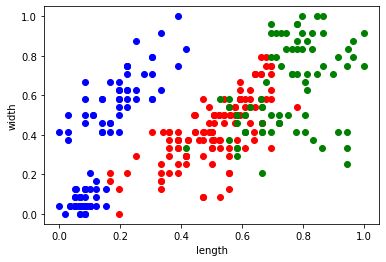

In [27]:
plt.scatter(df[df["clusters1"]==0][["sepal length (cm)","petal length (cm)"]],df[df["clusters1"]==0] \
            [["sepal width (cm)","petal width (cm)"]],color="r")
plt.scatter(df[df["clusters1"]==1][["sepal length (cm)","petal length (cm)"]],df[df["clusters1"]==1]\
            [["sepal width (cm)","petal width (cm)"]],color="b")
plt.scatter(df[df["clusters1"]==2][["sepal length (cm)","petal length (cm)"]],df[df["clusters1"]==2]\
            [["sepal width (cm)","petal width (cm)"]],color="g")
plt.xlabel("length")
plt.ylabel("width")